# Decision Tree Model for Image Classification (Digits Dataset)

This notebook builds a **Decision Tree classifier** for image classification
using the handwritten digits dataset from scikit-learn.

It is designed for students who are **new to machine learning** and
want to see a complete, well-documented example in Python.

### What you will learn
- How to load a built-in image dataset
- How to visualize image data
- How to prepare image data for a Decision Tree
- How to train and evaluate a Decision Tree classifier
- How to visualize predictions and (optionally) the tree structure


In [1]:
# ==========================================
# 1. Import the required libraries
# ==========================================
# In this cell, we import all the Python packages we need.
# - numpy: for numerical operations
# - matplotlib: for plotting images and graphs
# - sklearn (scikit-learn): for datasets, models, and evaluation tools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# This Jupyter magic command makes plots show up inside the notebook.
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Load and inspect the digits dataset

We will use the `load_digits` dataset provided by scikit-learn.

Each data point is:
- An **8×8 grayscale image** of a handwritten digit (0–9)
- A **label** indicating which digit it is

We will first load the dataset and then check its basic properties
such as shape and the type of labels it contains.

In [2]:
# ==========================================
# 2. Load the digits dataset
# ==========================================

# Load the dataset into a variable called 'digits'
digits = load_digits()

# The images are stored in digits.images as 8x8 arrays
images = digits.images  # shape: (n_samples, 8, 8)

# The labels (which digit each image represents) are in digits.target
labels = digits.target  # shape: (n_samples,)

# Print some basic information about the dataset
print("Dataset keys:", digits.keys())
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
print("Unique labels:", np.unique(labels))

Dataset keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Images shape: (1797, 8, 8)
Labels shape: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize some sample images

It is always a good idea to **look at the data**.

Here, we will display a few of the images and their corresponding labels
to make sure we understand what the model will be trained on.

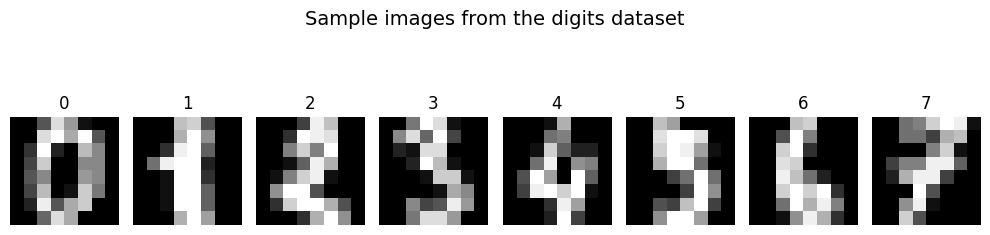

In [3]:
# ==========================================
# 3. Show sample images with their labels
# ==========================================

num_samples_to_show = 8  # how many images to display

plt.figure(figsize=(10, 3))  # set the figure size

for i in range(num_samples_to_show):
    # Create a subplot (1 row, num_samples_to_show columns)
    plt.subplot(1, num_samples_to_show, i + 1)

    # Display the image in grayscale
    plt.imshow(images[i], cmap='gray')

    # Remove axis ticks for clarity
    plt.axis('off')

    # Use the label as the title
    plt.title(labels[i])

plt.suptitle("Sample images from the digits dataset", fontsize=14)
plt.tight_layout()
plt.show()

## 4. Prepare the data for the Decision Tree

Machine learning models in scikit-learn expect the input features `X` to be a
2D array of shape:

`(number_of_samples, number_of_features)`

Right now, each image is an 8×8 array. We will:

1. **Flatten** each image (8×8) into a 1D array of length 64.
2. Split the data into **training** and **test** sets.

- The **training set** is used to fit the model.
- The **test set** is used to evaluate how well the model generalizes
  to new, unseen data.

In [4]:
# ==========================================
# 4. Flatten images and create train/test split
# ==========================================

# Number of samples (images) we have
n_samples = images.shape[0]

# Flatten each 8x8 image into a vector of length 64 (8 * 8)
# reshape((n_samples, -1)) means: n_samples rows, and let numpy
# figure out how many columns (here it becomes 64).
X = images.reshape((n_samples, -1))
y = labels

print("Flattened X shape:", X.shape)  # should be (n_samples, 64)
print("Labels y shape:", y.shape)

# Now we split X and y into training and test sets.
# test_size=0.2 means 20% of the data will be used as the test set.
# stratify=y keeps the class distribution similar in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Flattened X shape: (1797, 64)
Labels y shape: (1797,)
Training set size: 1437
Test set size: 360


## 5. Train a Decision Tree classifier

We will now create and train a `DecisionTreeClassifier`.

Some key parameters:
- `criterion="gini"`: use Gini impurity to measure the quality of splits.
- `max_depth=10`: limit the depth of the tree to avoid overfitting.
- `random_state=42`: set a seed so results are reproducible.

Steps:
1. Create the model.
2. Fit the model on the training data.
3. Confirm that training is done.

In [5]:
# ==========================================
# 5. Create and train the Decision Tree model
# ==========================================

# Create the Decision Tree classifier
tree_clf = DecisionTreeClassifier(
    criterion='gini',  # how to measure the quality of a split
    max_depth=10,      # limit the depth of the tree
    random_state=42    # for reproducible results
)

# Train (fit) the model on the training data
tree_clf.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


## 6. Evaluate the model

To understand how good our model is, we will:

1. Compute **accuracy** on both the training set and the test set.
2. Print a **classification report** (precision, recall, F1-score for each class).
3. Plot a **confusion matrix** to see which digits are being confused.

- If training accuracy is much higher than test accuracy, the model may be **overfitting**.
- If both are low, the model may be **underfitting** or the problem may be challenging.

In [6]:
# ==========================================
# 6a. Accuracy and classification report
# ==========================================

# Predict labels for the training and test sets
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Compute accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy:     {test_accuracy:.4f}")

# Print a detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training accuracy: 0.9875
Test accuracy:     0.8111

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.66      0.69      0.68        36
           2       0.93      0.80      0.86        35
           3       0.79      0.81      0.80        37
           4       0.86      0.83      0.85        36
           5       0.88      0.95      0.91        37
           6       0.86      0.83      0.85        36
           7       0.81      0.83      0.82        36
           8       0.63      0.69      0.66        35
           9       0.79      0.72      0.75        36

    accuracy                           0.81       360
   macro avg       0.81      0.81      0.81       360
weighted avg       0.81      0.81      0.81       360



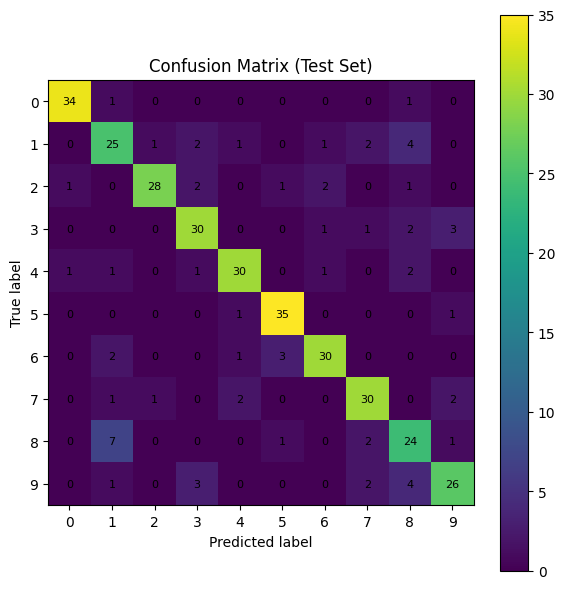

In [7]:
# ==========================================
# 6b. Confusion matrix
# ==========================================

# Compute the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Test Set)")
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Define tick marks for digits 0-9
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Add the counts in each cell of the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=8)

plt.tight_layout()
plt.show()

## 7. Visualize some test predictions

To build intuition, we will look at a few images from the **test set** and compare:
- The **true label**
- The **predicted label** from our model

This helps us see examples of correct and incorrect predictions.

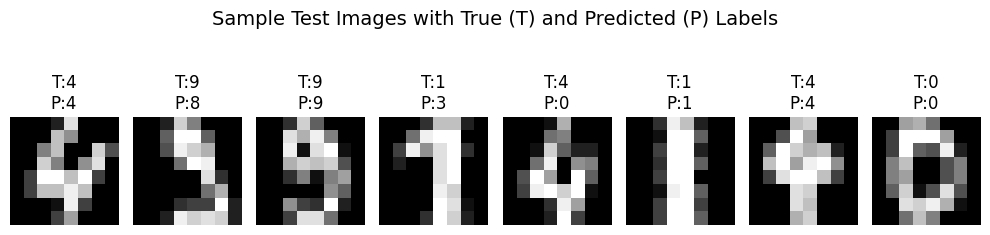

In [8]:
# ==========================================
# 7. Show sample test images with predictions
# ==========================================

num_to_show = 8  # Number of images to visualize

# Randomly choose some indices from the test set
np.random.seed(42)
indices = np.random.choice(len(X_test), size=num_to_show, replace=False)

plt.figure(figsize=(10, 3))

for i, idx in enumerate(indices):
    # Get the flattened image and reshape it back to 8x8
    image = X_test[idx].reshape(8, 8)
    true_label = y_test[idx]
    pred_label = y_test_pred[idx]

    plt.subplot(1, num_to_show, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Show true label (T) and predicted label (P)
    plt.title(f"T:{true_label}\nP:{pred_label}")

plt.suptitle("Sample Test Images with True (T) and Predicted (P) Labels", fontsize=14)
plt.tight_layout()
plt.show()

## 8. (Optional) Visualize a small Decision Tree

Real Decision Trees for image data can be very large and hard to read.

Here, we will train a **smaller tree** with `max_depth=3` purely for visualization,
so that we can see the structure of the tree and how it splits on pixel values.

This is not meant to be a high-performance model, but an **interpretable example**.

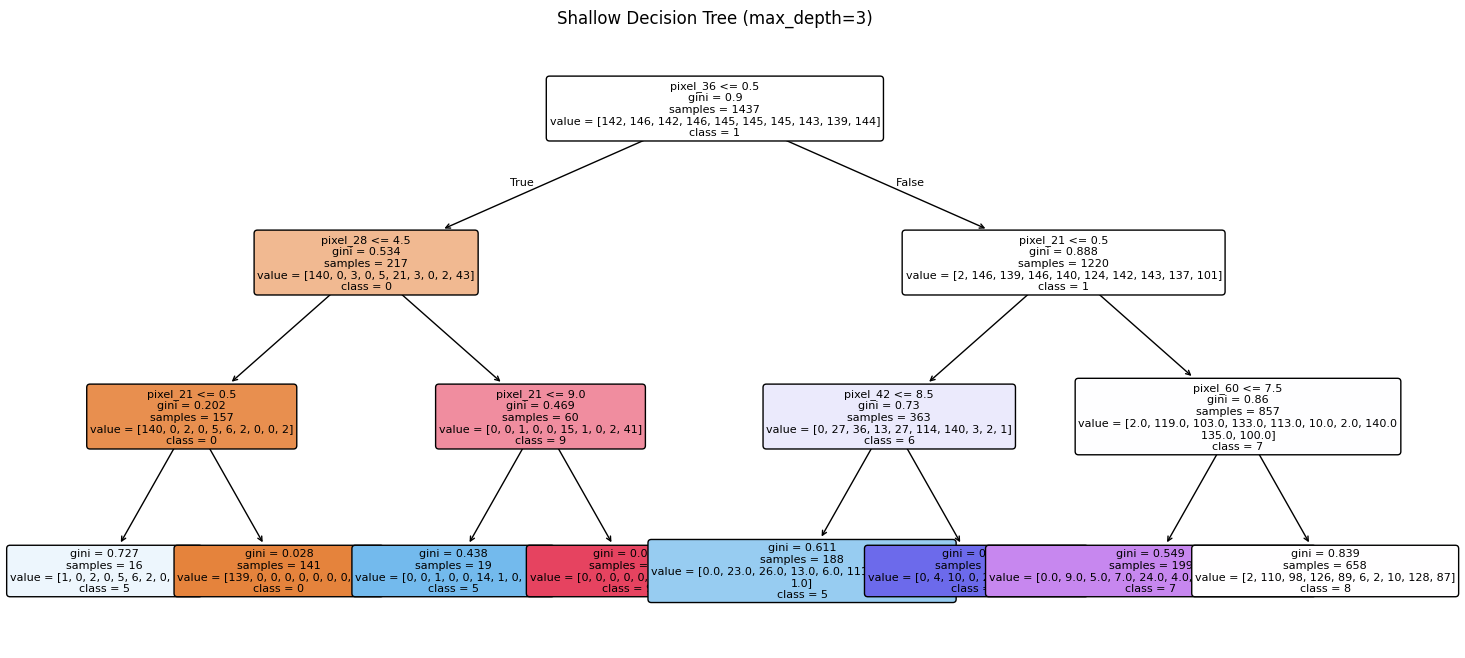

In [9]:
# ==========================================
# 8. Train and plot a shallow Decision Tree
# ==========================================

# Create a new Decision Tree with a small max_depth for visualization
small_tree_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,     # very shallow tree
    random_state=42
)

# Train the small tree on the same training data
small_tree_clf.fit(X_train, y_train)

plt.figure(figsize=(18, 8))
plot_tree(
    small_tree_clf,
    filled=True,
    feature_names=[f"pixel_{i}" for i in range(X_train.shape[1])],
    class_names=[str(c) for c in np.unique(y)],
    rounded=True,
    fontsize=8
)
plt.title("Shallow Decision Tree (max_depth=3)")
plt.show()

A Decision Tree chooses one feature (one pixel) at every split by asking:

❓ “**Which pixel, if I split on it, will best separate the digits?**”

Scikit-learn’s tree uses Gini impurity (or entropy) to measure how good a split is.

At each node, it tries all 64 pixels, and finds the one that:

*   most reduces impurity,
*   most separates different digits cleanly,
*   leaves the fewest mixed examples under each branch.

So pixels **36, 21, 42, 60, 28** were:

✨ **statistically the most informative places in the images**

✨ **the pixels most different across digit classes**

✨ **the pixels whose brightness changes meaningfully between numbers**

## 9. Summary

In this notebook, you learned how to:

1. Load and visualize the handwritten digits dataset.
2. Flatten 2D images into 1D feature vectors.
3. Split data into training and test sets.
4. Train a `DecisionTreeClassifier` for image classification.
5. Evaluate the model using accuracy, classification reports, and confusion matrices.
6. Visualize individual predictions and a shallow tree structure.

Although Decision Trees are not the most powerful models for image data, they are:
- Easy to interpret
- Quick to train
- Helpful for learning core machine learning concepts

From here, you can experiment with:
- Changing `max_depth` and other hyperparameters
- Using ensemble methods like Random Forests
- Trying more advanced models such as Convolutional Neural Networks (CNNs) for image tasks.